# Validating the best algorithms

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
!ls /home/andreag/Work/1.main_project/1.coacervsML/1.dataset_exploration/0.sliced_dataframe/

coacervate_starting_df_18032024_cleaned.csv  lys_asp_MWca_38.0_13.2_salt.png
coacervate_starting_df_18032024_lys_asp.csv  lys_asp_MWca_38.0_37.0.csv
lys_asp_MWca_16.525_37.0.csv		     lys_asp_MWca_38.0_37.0.png
lys_asp_MWca_16.525_37.0.png		     lys_asp_MWca_3.8_13.2.csv
lys_asp_MWca_38.0_13.2.csv		     lys_asp_MWca_3.8_13.2.png
lys_asp_MWca_38.0_13.2.png		     lys_asp_MWca_3.8_4.2.csv
lys_asp_MWca_38.0_13.2_salt.csv		     lys_asp_MWca_3.8_4.2.png


## Active Learning input parameters

-   SVC

In [3]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'SVC'

# specific parameters
clf_dict = dict(
    kernel='rbf',
    gamma='auto',
    probability=True,
    random_state=73
)

-   GPC

In [4]:
# from classification import ClassifierModel
# from classification import RBF

# # define the classifier model
# clf_model = 'GaussianProcessClassifier'

# # specific parameters
# clf_dict = dict(
#     kernel=1. * RBF(1.0), 
#     random_state=73
# )

-   MLPC

In [5]:
# # define the classifier model
# clf_model = 'MLPC'

# # specific parameters
# clf_dict = dict(
#     # hidden_layer_sizes=(16,32,64),
#     hidden_layer_sizes=(128,),
#     learning_rate='adaptive',
#     alpha=1, 
#     max_iter=1000, 
#     random_state=73
# )

In [6]:
from acquisition import DecisionFunction

acqui_mode = 'exploration'
ac_func = DecisionFunction(mode=acqui_mode, 
                           decimals=2)

In [7]:
# sampling of () points

sampling_mode = 'FPS'

In [8]:
# new batch

n_batch = 5

## Data

In [9]:
data_dir = '/home/andreag/Work/1.main_project/1.coacervsML/1.dataset_exploration/0.sliced_dataframe/'
dataset = 'lys_asp_MWca_38.0_13.2.csv'

_df = pd.read_csv(data_dir+dataset).drop(labels='Unnamed: 0', axis=1)

## 2D single cycle

In [10]:
data_scaling = True

f0, f1, ft = ['Conc_Anion_C(C(C(=O)O)N)C(=O)O', 'Conc_Cation_C(CCN)CC(C(=O)O)N', 'Phase']

if data_scaling:
    print('Applying scaling')

    y = _df[ft]

    df = _df.drop(columns=ft)
    columns = df.columns
    df = StandardScaler().fit_transform(X=df)
    df = pd.DataFrame(data=df, columns=columns)

    X, X0, X1 = df[[f0,f1]], df[f0], df[f1]

else:
    print('No scaling')
    X, X0, X1, y = _df[[f0,f1]], _df[f0], _df[f1], _df[ft]

Applying scaling


In [11]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Conc_Anion_C(C(C(=O)O)N)C(=O)O  324 non-null    float64
 1   Conc_Cation_C(CCN)CC(C(=O)O)N   324 non-null    float64
dtypes: float64(2)
memory usage: 5.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 324 entries, 0 to 323
Series name: Phase
Non-Null Count  Dtype
--------------  -----
324 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


(None, None)

In [12]:
X.var()

Conc_Anion_C(C(C(=O)O)N)C(=O)O    1.003096
Conc_Cation_C(CCN)CC(C(=O)O)N     1.003096
dtype: float64

In [13]:
start_idxs = [i for i,p in enumerate(y) if p != -1]
start_idxs

[0, 1, 2, 3, 4]

In [14]:
from learning import active_learning_cycle
from utils.beauty import plot_active_learning_cycle, plot_simple_al_output

In [15]:
# init the classifier

al_clf = ClassifierModel(model=clf_model, **clf_dict)

In [16]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 54 points that shares the same acquisition criteria.
Selecting 5 by 'FPS' sampling.


[263, 5, 134, 323, 189]

classes: 2


/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


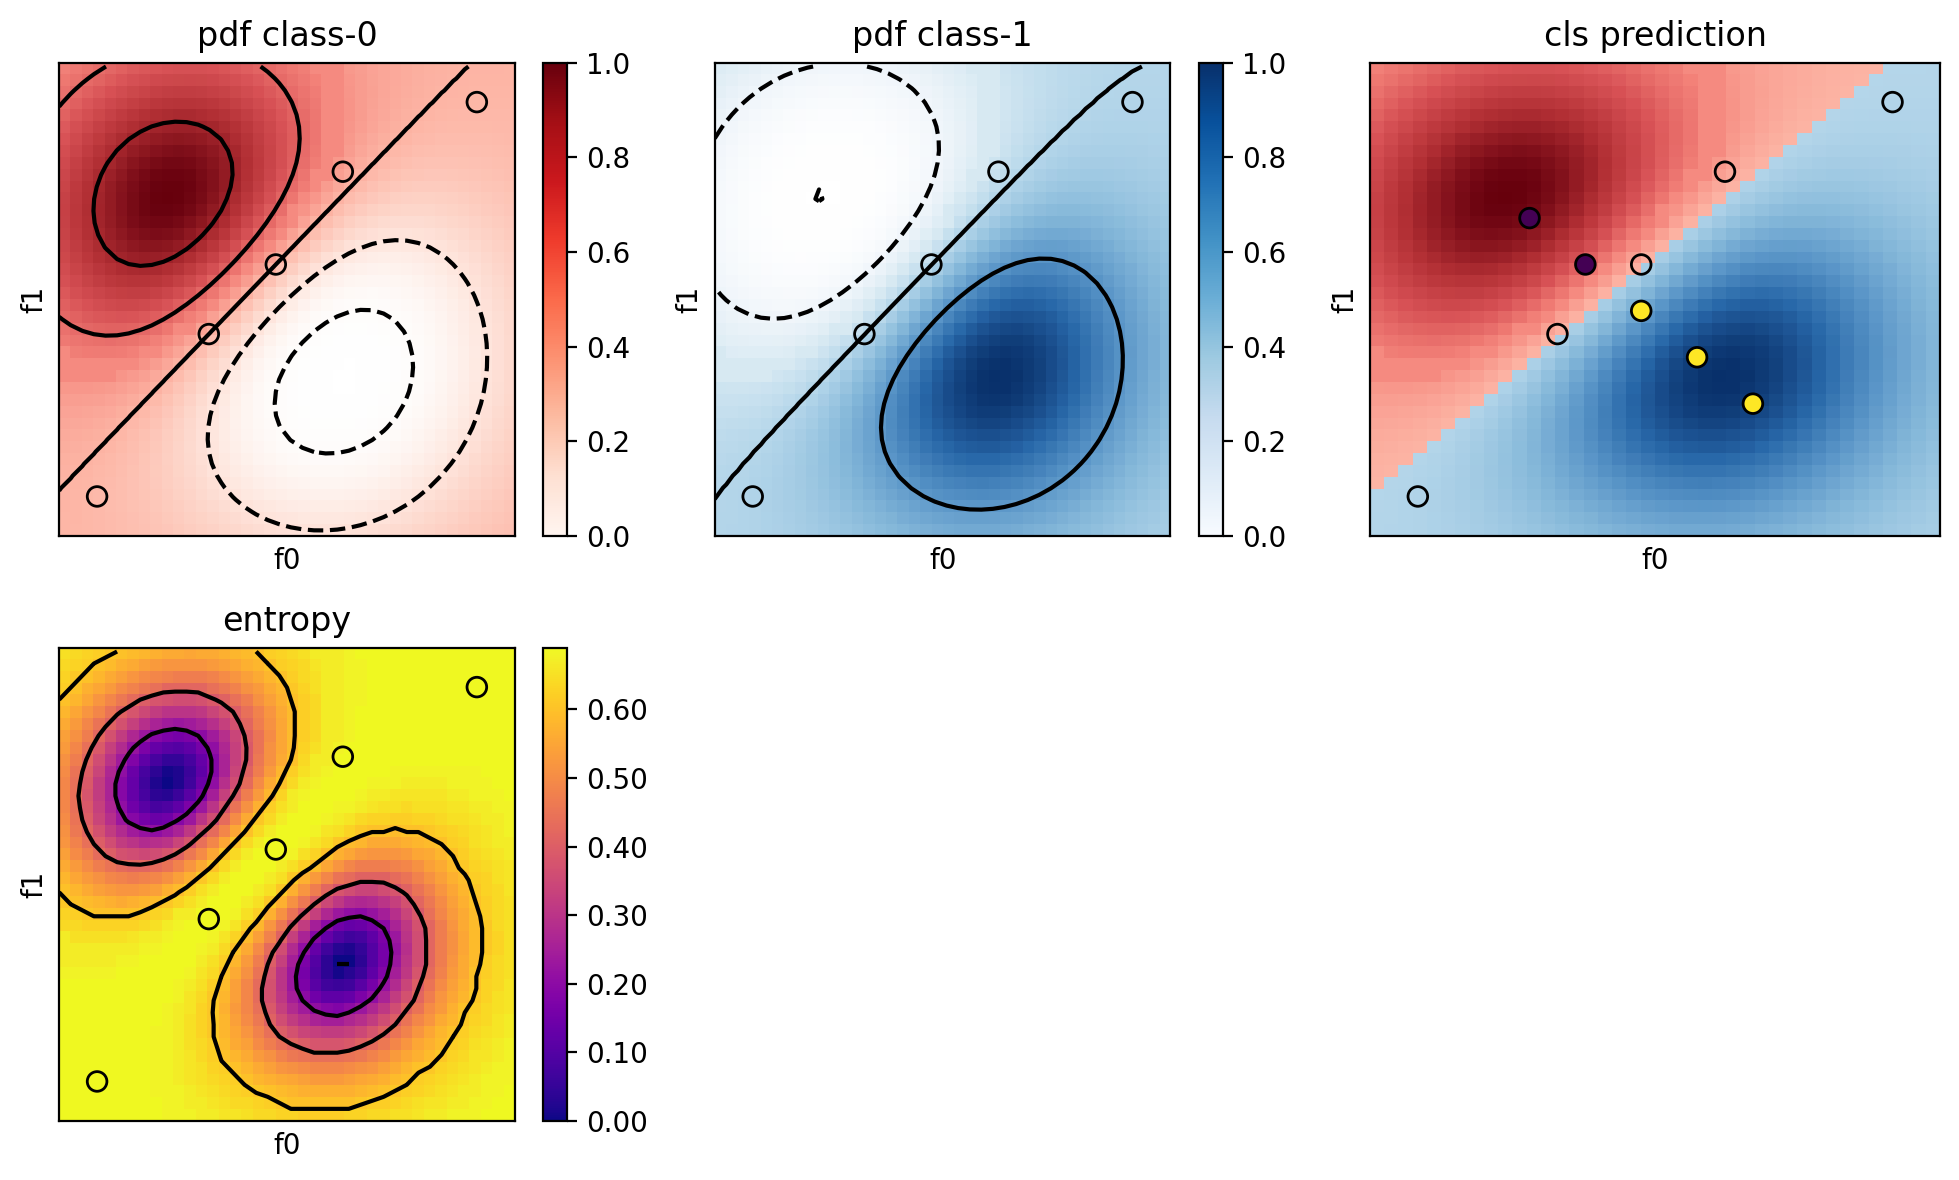

In [17]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

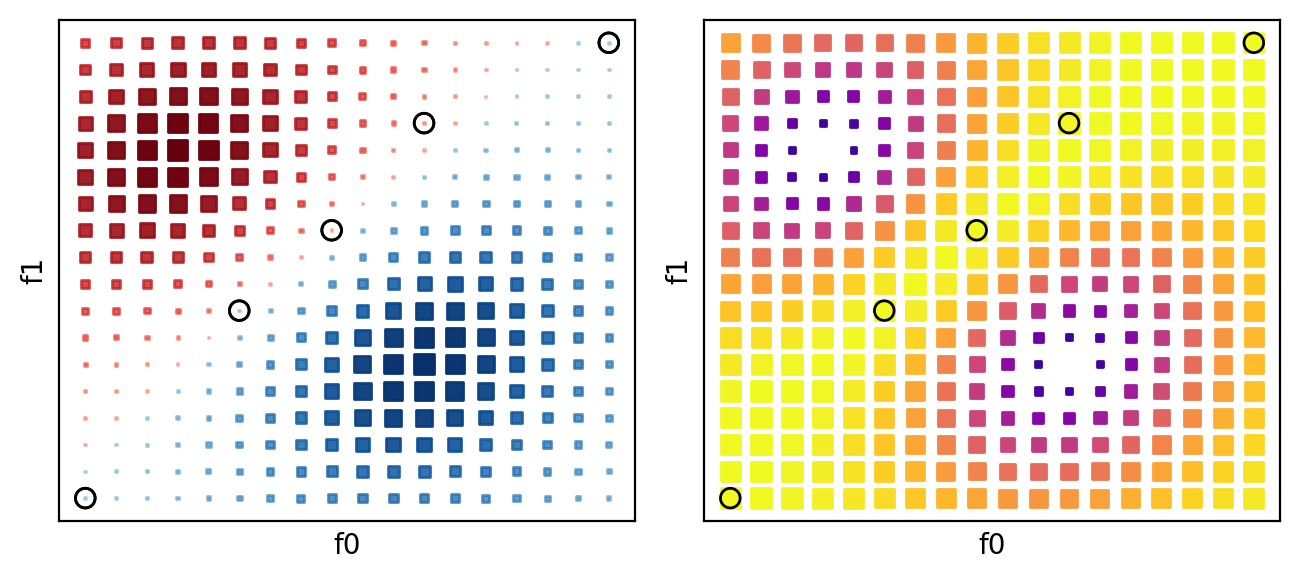

In [18]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)

### Under the hood

In [19]:
al_clf.clf.__str__()

"SVC(gamma='auto', probability=True, random_state=73)"

In [20]:
al_clf.clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 73,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

-   Decision function

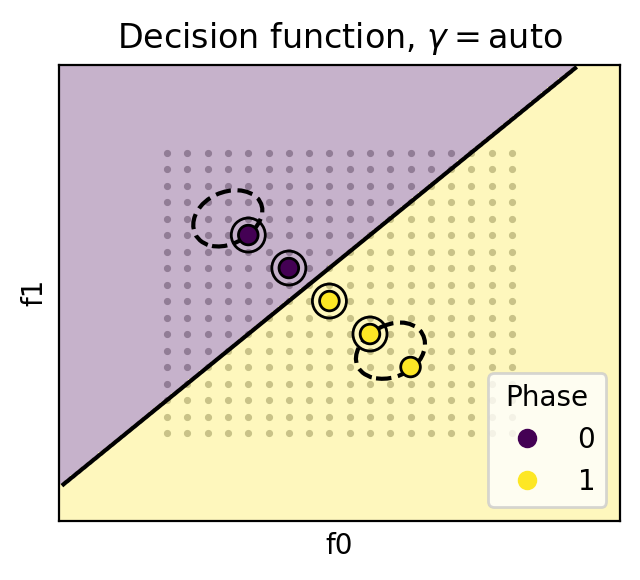

In [21]:
import phdtools.plots as phdplot
from sklearn.inspection import DecisionBoundaryDisplay

try:
    fig, ax = phdplot.get_axes(1,1)

    ax.scatter(X0, X1, c='.7', marker='.', s=10)
    scatter = ax.scatter(X0[start_idxs], X1[start_idxs], c=y[start_idxs], edgecolor='0.', s=50, zorder=4)
    ax.legend(*scatter.legend_elements(), loc='lower right', title='Phase')
    # ax.scatter(X0[new_idxs_fps], X1[new_idxs_fps], c='0.', marker='o', s=50, zorder=4)

    ax.scatter(
        al_clf.clf.support_vectors_[:,0],
        al_clf.clf.support_vectors_[:,1],
        s=150,
        facecolor='none',
        edgecolor='k',
        zorder=4,
    )

    DecisionBoundaryDisplay.from_estimator(
        estimator=al_clf.clf,
        X=X,
        ax=ax,
        response_method='predict',
        plot_method='pcolormesh',
        alpha=.3,
    )

    DecisionBoundaryDisplay.from_estimator(
        estimator=al_clf.clf,
        X=X,
        ax=ax,
        response_method='decision_function',
        plot_method='contour',
        levels=[-1,0,1],
        colors=['k','k','k'],
        linestyles=['--','-','--'],
    )

    ax.set_xlabel('f0')
    ax.set_ylabel('f1')
    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(rf'Decision function, $\gamma=${al_clf.clf.gamma}')

    fig.tight_layout()
except:
    print('Not SV related method.')

-   Entropy regions and points selection

In [22]:
Z = al_clf.predict_proba(X=X)

In [23]:
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.preprocessing import MinMaxScaler

from activeclf.acquisition import sampling_fps

from phdtools.plots import get_axes

def plot_entropy(X, Z, decimals=2, levels=5, scaling=True):
    # get the space
    X0, X1 = X

    # compute H
    if scaling:
        Z = MinMaxScaler().fit_transform(X=Z)
    H = np.around(scipy.stats.entropy(pk=Z, axis=1), decimals=decimals)
    H_val_chunks = np.sort(np.unique(H))[::-1][:levels]

    palette = sns.color_palette(palette='colorblind', n_colors=levels)

    H_idx_chunks_list = [
        [id for id,val in enumerate(H) if val == hchunk]
        for hchunk in H_val_chunks
        ]
    
    fig, ax = get_axes(2,2)
    ax[0].scatter(X0, X1, c=H, cmap='plasma', s=H*70, marker='s', zorder=1)
    ax[0].set_xlabel('f0')
    ax[0].set_ylabel('f1')
    ax[0].set_title('H space')
    ax[0].set_xticks(())
    ax[0].set_yticks(())

    ax[1].scatter(X0, X1, facecolor='none', edgecolor='0.', s=H*70, marker='s', zorder=2)
    ax[1].set_xlabel('f0')
    ax[1].set_ylabel('f1')
    ax[1].set_title('discretization')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    for i,idx in enumerate(H_idx_chunks_list):
        ax[1].scatter(X0[idx], X1[idx], c=[palette[i]]*len(idx), s=H[idx]*40, 
                      label=f'{H_val_chunks[i]} ({len(idx)})',
                      marker='s', zorder=1)
        
    ax[1].legend(title='H Levels', loc='center left', bbox_to_anchor=(1, 0.5))

    pass


def plot_entropy_selection(X, Z, num_points, levels=5, decimals=2, scaling=True):

    # get the space
    XX, X0, X1 = X

    # compute H
    if scaling:
        Z = MinMaxScaler().fit_transform(X=Z)
    H = np.around(scipy.stats.entropy(pk=Z, axis=1), decimals=decimals)
    H_max_ndx = np.argmax(H)
    H_val_chunks = np.sort(np.unique(H))[::-1][:levels]

    H_idx_chunks_list = [
        [id for id,val in enumerate(H) if val == hchunk]
        for hchunk in H_val_chunks
        ]
    
    subspace = get_subspace(indexes=H_idx_chunks_list, points=num_points)
    palette = sns.color_palette(palette='colorblind', n_colors=levels)

    fig, ax = get_axes(3, 2)
    ax[0].scatter(X0, X1, c=H, cmap='plasma', s=H*70, marker='s', zorder=1)
    ax[0].set_xlabel('f0')
    ax[0].set_ylabel('f1')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    for i,sub in enumerate(subspace):
        ax[0].scatter(X0[sub], X1[sub], c=[palette[i]]*len(sub), s=H[sub]*35, marker='*', zorder=2)

    ax[1].scatter(X0, X1, facecolor='none', edgecolor='0.', s=H*70, marker='s', zorder=2)
    ax[1].set_xlabel('f0')
    ax[1].set_ylabel('f1')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    for i,idx in enumerate(H_idx_chunks_list):
        ax[1].scatter(X0[idx], X1[idx], c=[palette[i]]*len(idx), s=H[idx]*40, 
                      label=f'{H_val_chunks[i]}',
                      marker='s', zorder=1)

    ax[1].legend(title='H Levels', loc='center left', bbox_to_anchor=(1, 0.5))

    _fps_points = sampling_fps(X=XX.iloc[np.concatenate(subspace)],
                               n=num_points, start_idx=0)
    fps_points = [np.concatenate(subspace)[sp] for sp in _fps_points]
    ax[2].scatter(X0, X1, c=H, cmap='plasma', s=H*70, marker='s', alpha=.2, zorder=1)
    ax[2].set_xlabel('f0')
    ax[2].set_ylabel('f1')
    ax[2].set_xticks(())
    ax[2].set_yticks(())
    for i,sub in enumerate(subspace):
        ax[2].scatter(X0[sub], X1[sub], c=[palette[i]]*len(sub), s=H[sub]*35, alpha=.5, marker='*', zorder=2)
    ax[2].scatter(X0[fps_points[0]], X1[fps_points[0]], 
                  c='r', label='Start', edgecolor='0.',
                  s=50, zorder=3)
    ax[2].scatter(X0[fps_points], X1[fps_points], 
                  facecolor='none', edgecolor='0.',
                  s=50, zorder=3)
    ax[2].scatter(X0[fps_points[-1]], X1[fps_points[-1]], 
                  c='b', label='End', edgecolor='0.',
                  s=50, zorder=3)
    points = np.array([X0[fps_points], X1[fps_points]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=plt.get_cmap('vlag_r'), norm=plt.Normalize(0, 10))
    lc.set_array(np.arange(len(fps_points)))
    lc.set_linewidth(2)
    lc.autoscale()
    ax[2].add_collection(lc)
    ax[2].legend(title='FPS Path', loc='lower right')

    # fig.tight_layout()
    pass


def get_subspace(indexes: list[list[int]], points: int) -> list[list[int]]:
    sub_space = list()
    
    while True:

        for subidx in indexes:
            sub_space.append(subidx)

            if len(np.concatenate(sub_space)) >= points:
                break
    
        return sub_space
    

def plot_arrow_path(x,y, ax):
    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2)
    ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")



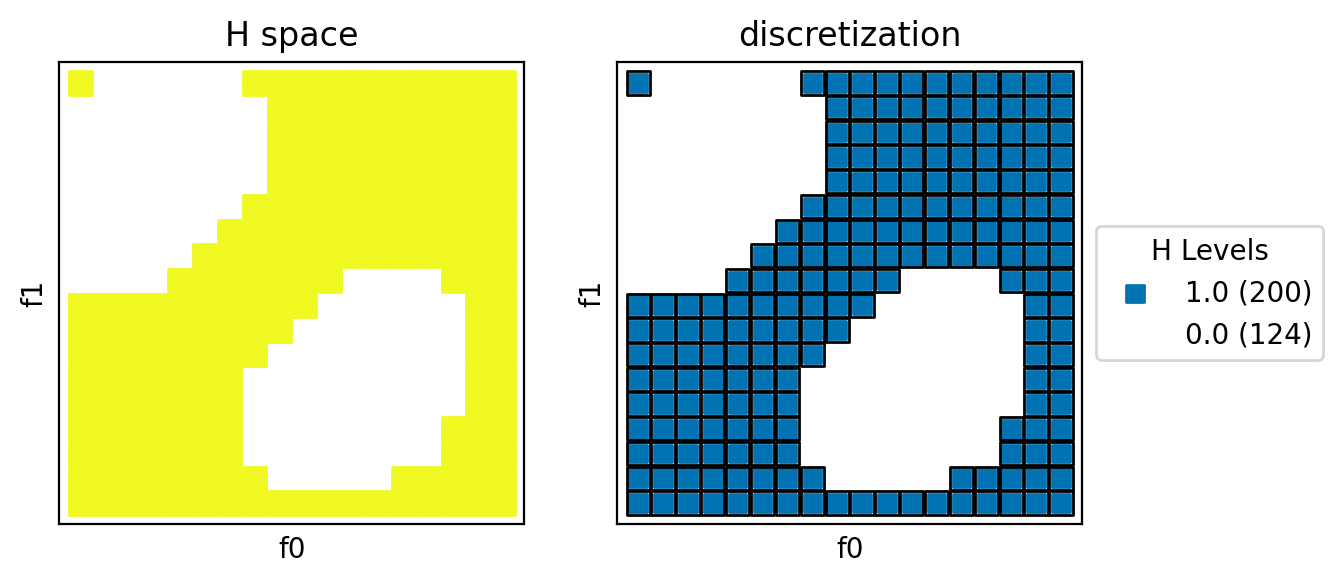

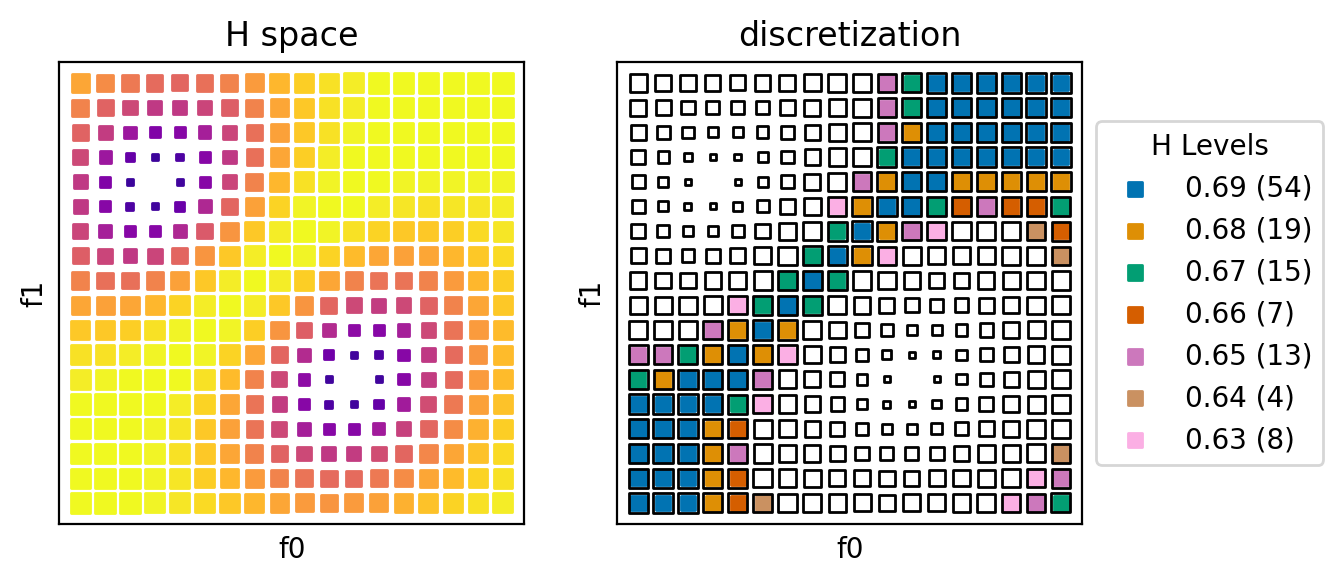

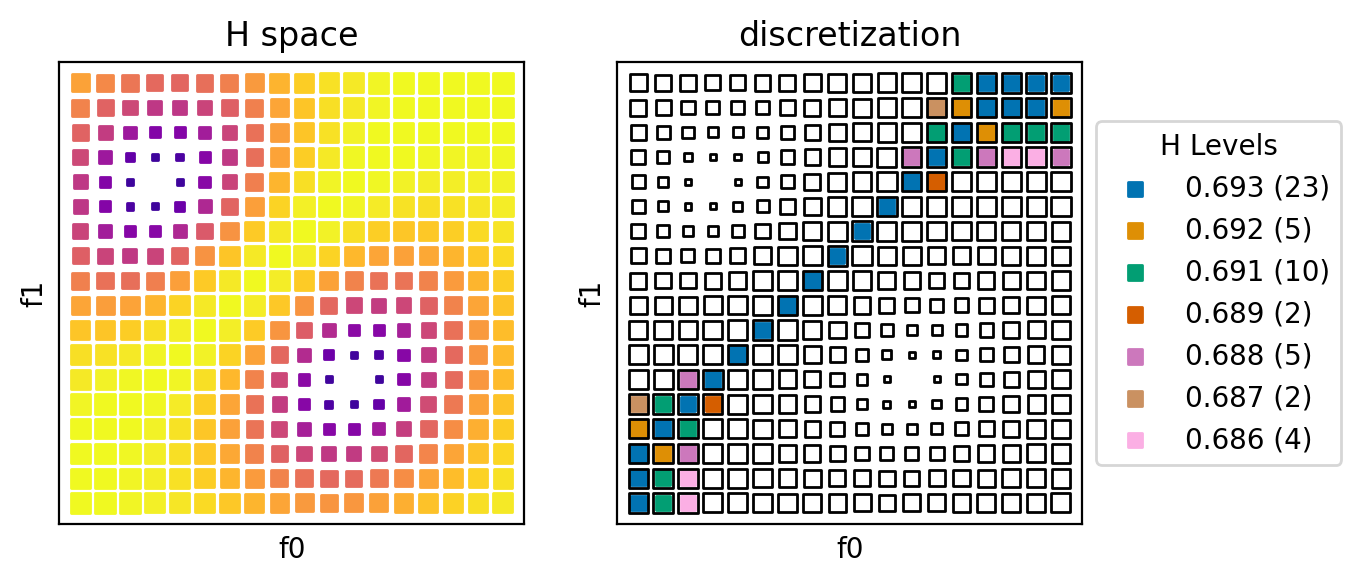

In [24]:
for dec in np.arange(4):
    plot_entropy(X=(X0,X1), Z=Z, levels=7, decimals=dec)

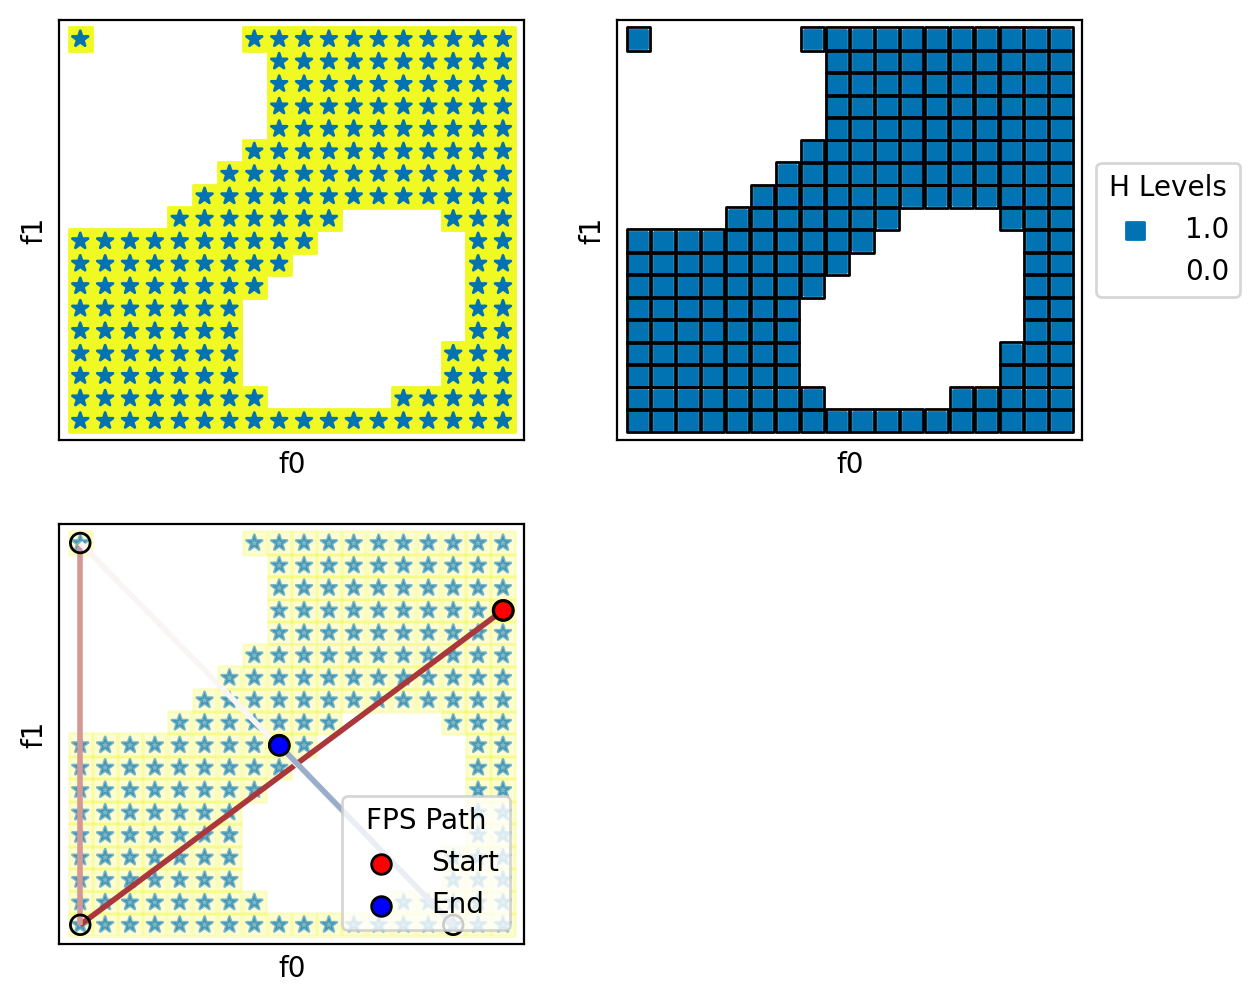

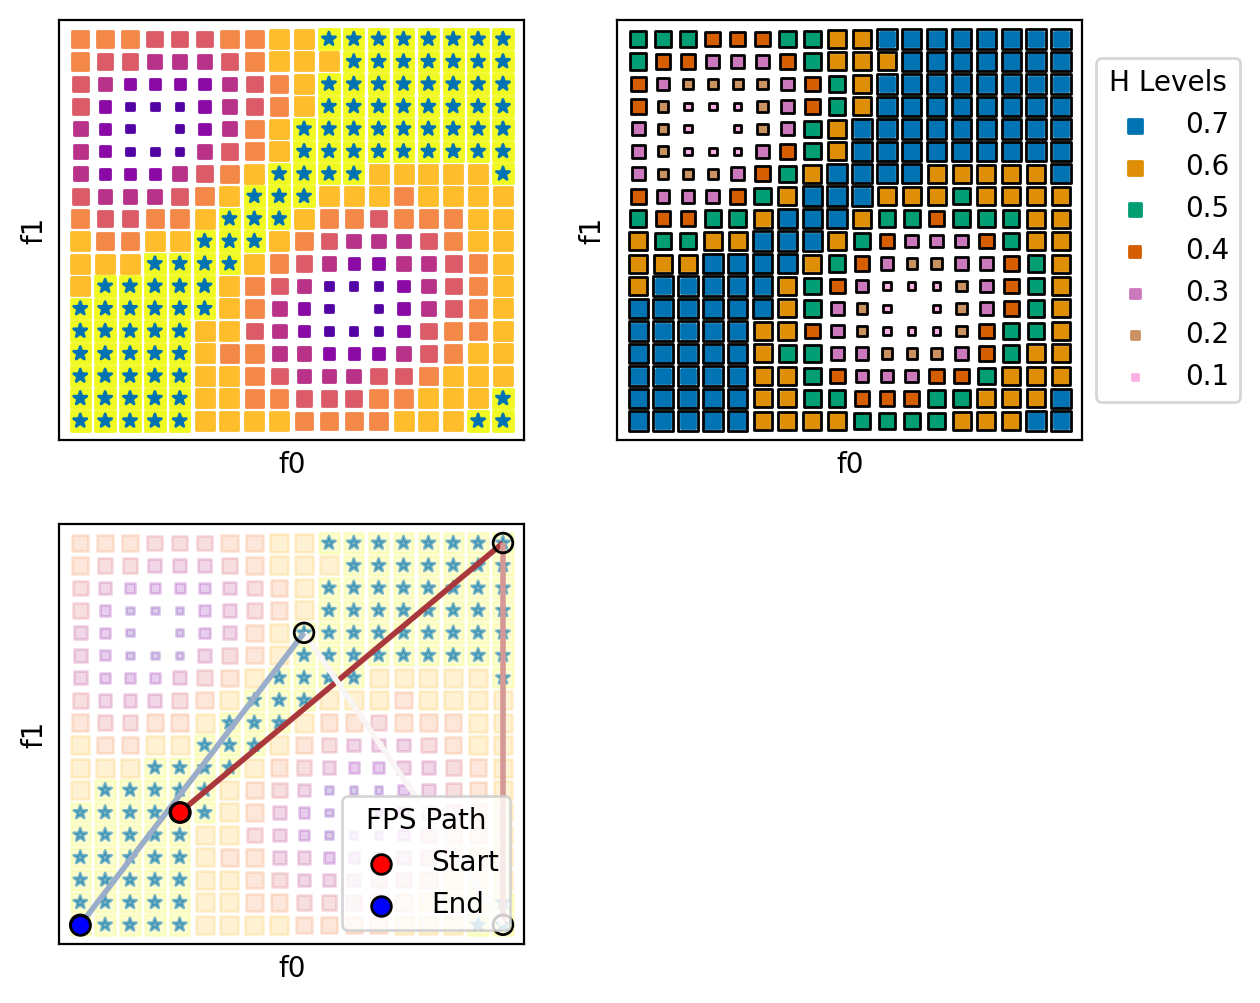

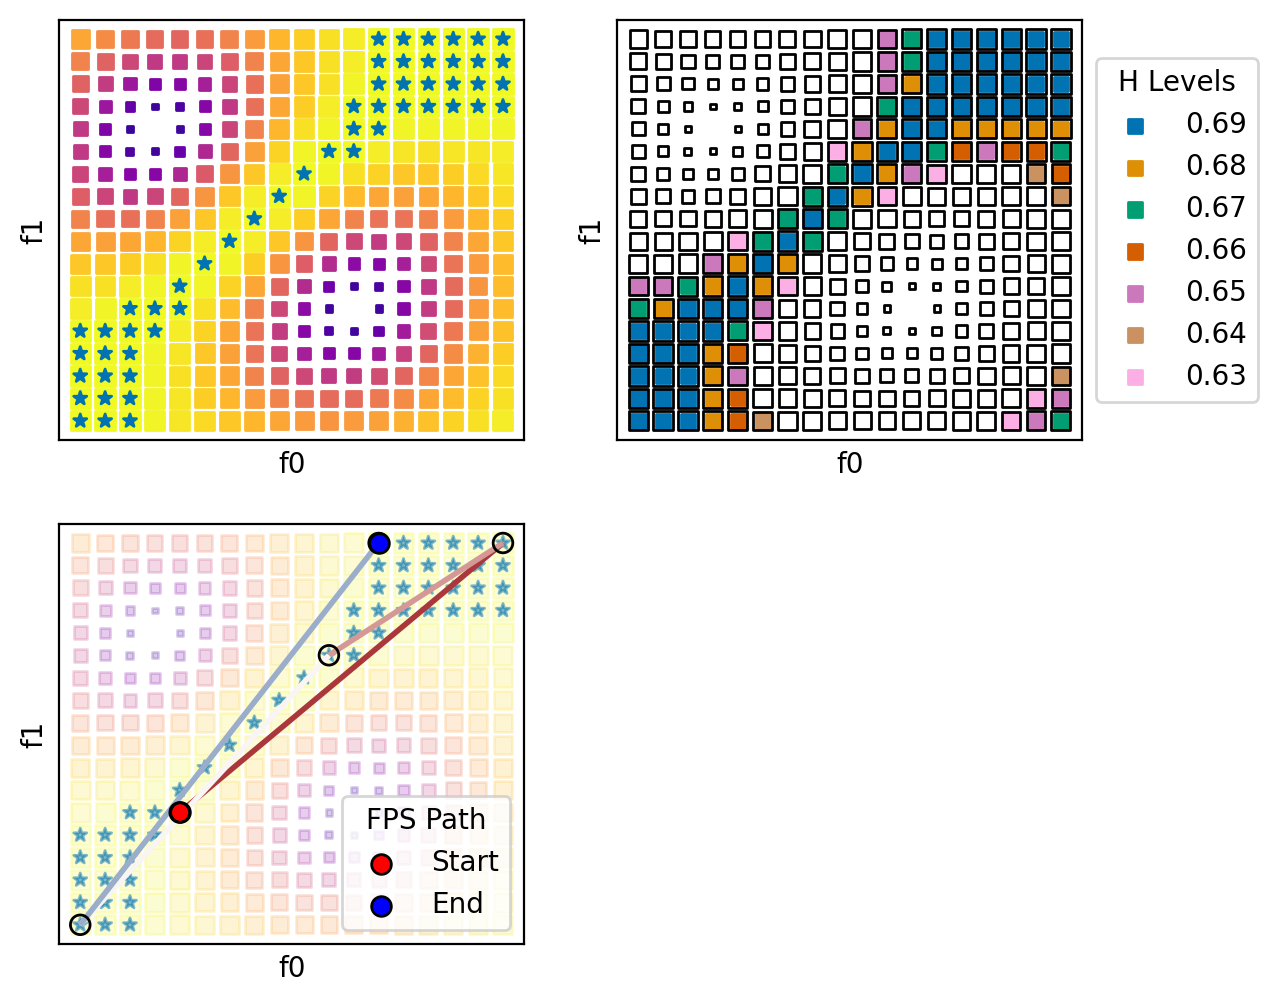

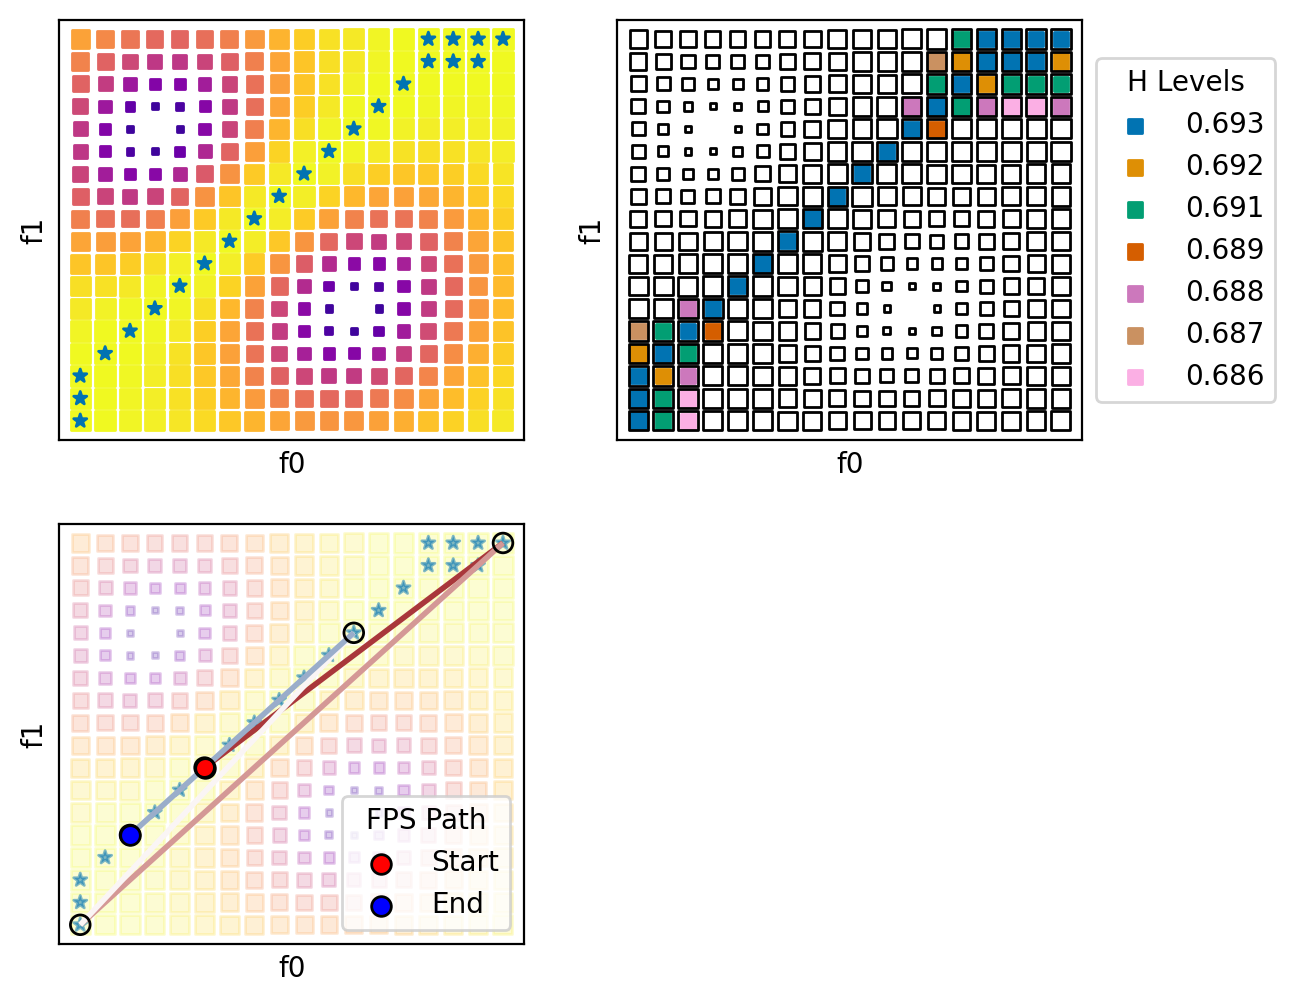

In [25]:
for dec in np.arange(4):
    plot_entropy_selection(X=(X,X0,X1), Z=Z, levels=7, num_points=5, decimals=dec)

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


def plot_entropy3D(X, Z, decimals, scaling=True):
    fig = plt.figure(figsize=(4,4), dpi=200)
    ax = fig.add_subplot(projection='3d')

    X0,X1 = X
    if scaling:
        Z = MinMaxScaler().fit_transform(X=Z)
    H = np.around(scipy.stats.entropy(pk=Z, axis=1), decimals=decimals)

    ax.scatter(
        X0, X1, H,
        c=H,
        cmap='plasma',
        s=H*70,
        alpha=1.,
        edgecolor='0.',
    )

    ax.set_xlabel('f0')
    ax.set_ylabel('f1')
    ax.set_zlabel('H')
    ax.set_xticks(())
    ax.set_yticks(())


    ax.set_proj_type('ortho')

    ax.azim = -145
    ax.dist = 10
    ax.elev = 7

    fig.tight_layout()

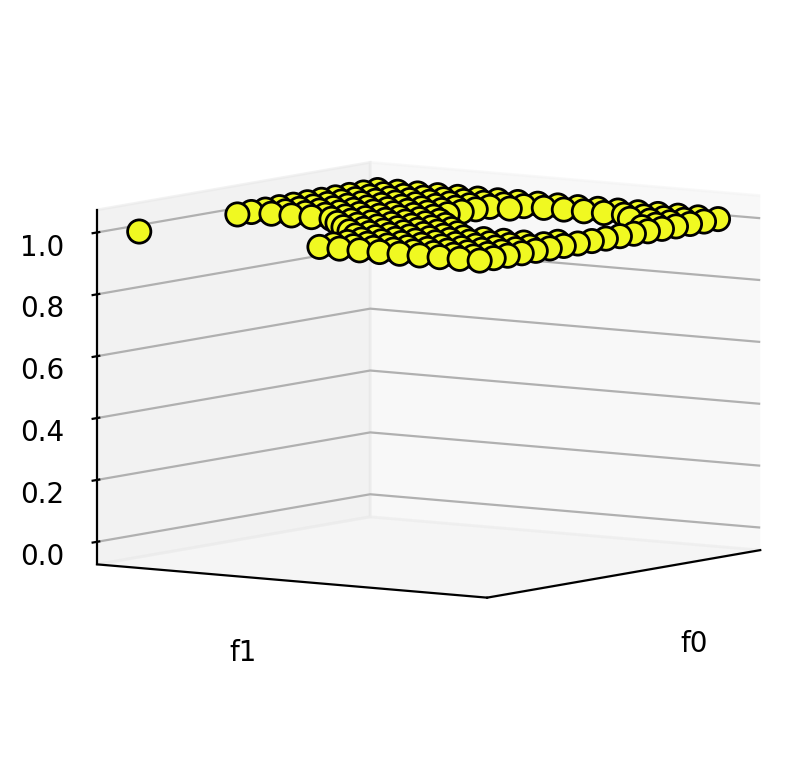

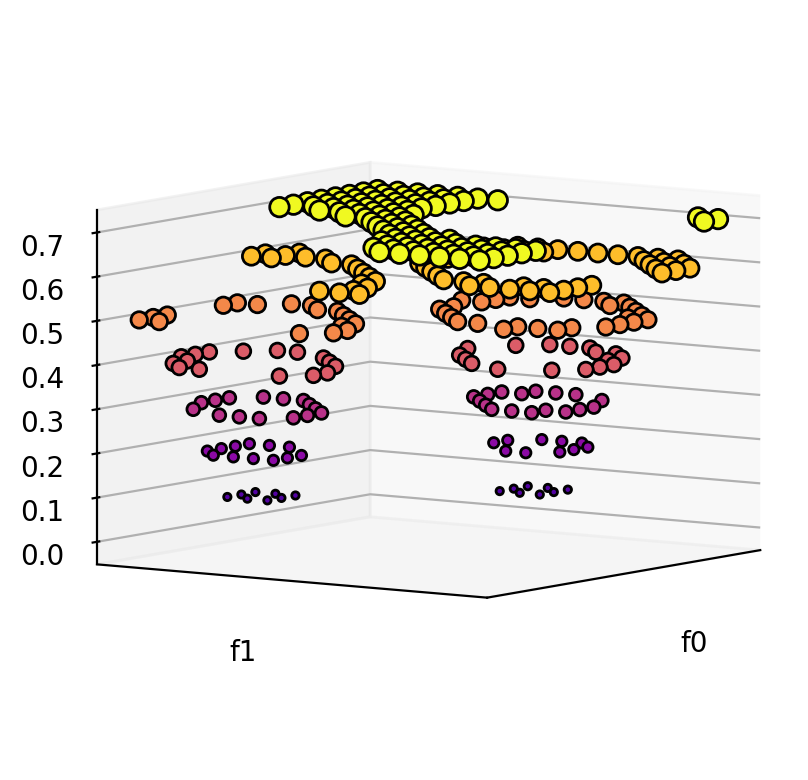

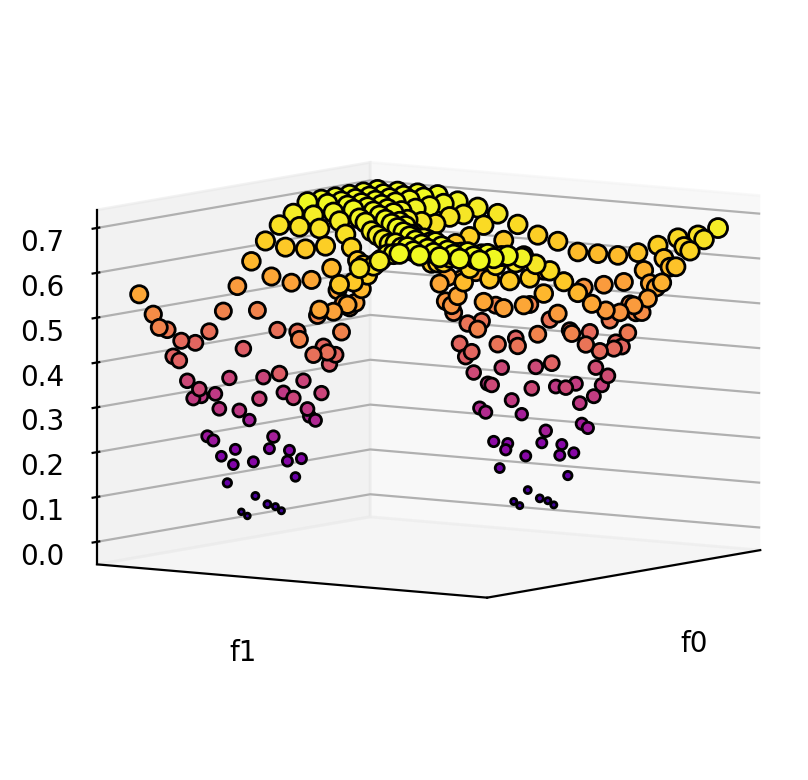

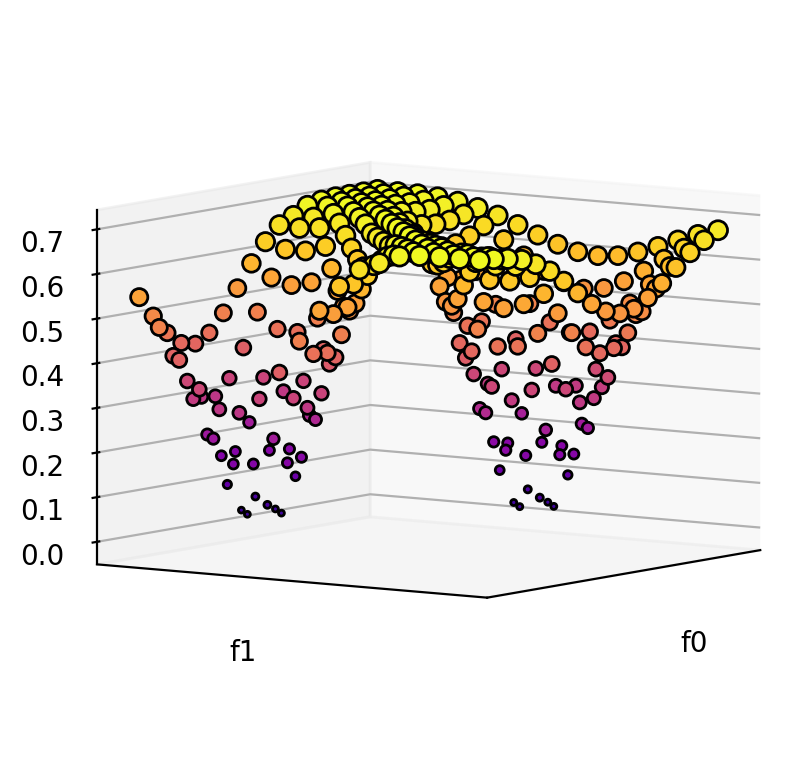

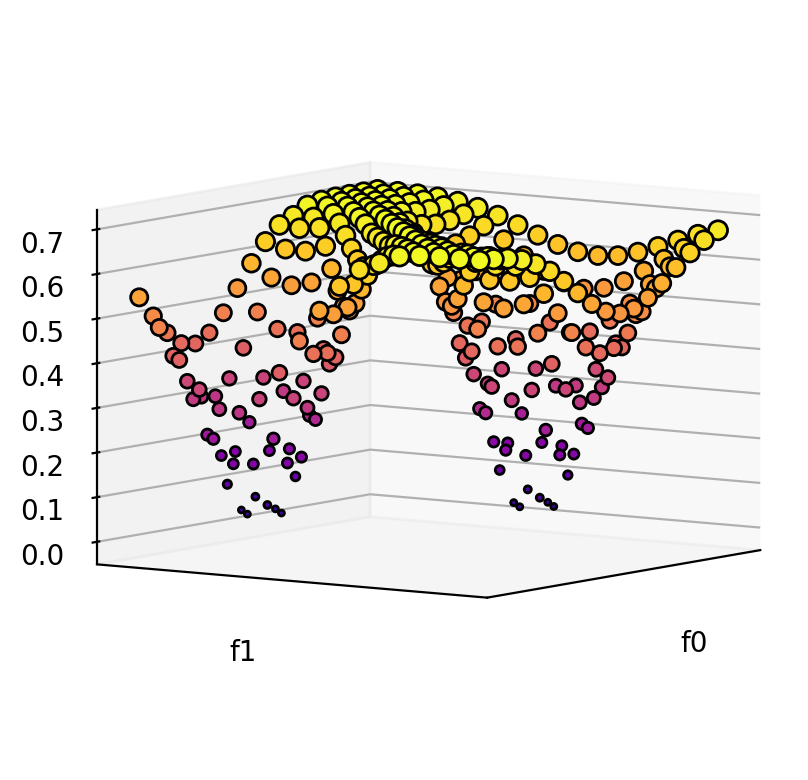

In [27]:
for dec in np.arange(5):
    plot_entropy3D(X=(X0,X1), Z=Z, decimals=dec)

## 3D

In [28]:
n_batch = 18

In [29]:
data_dir = '/home/andreag/Work/1.main_project/1.coacervsML/1.dataset_exploration/0.sliced_dataframe/'
dataset = 'lys_asp_MWca_16.525_37.0.csv'

_df = pd.read_csv(data_dir+dataset).drop(labels='Unnamed: 0', axis=1)

In [30]:
f0, f1, f2, ft = ['Conc_Anion_C(C(C(=O)O)N)C(=O)O', 'Conc_Cation_C(CCN)CC(C(=O)O)N', 'Conc_NaCl', 'Phase']

if data_scaling:
    print('Applying scaling')

    y = _df[ft]

    df = _df.drop(columns=ft)
    columns = df.columns
    df = StandardScaler().fit_transform(X=df)
    df = pd.DataFrame(data=df, columns=columns)

    X, X0, X1, X2 = df[[f0,f1,f2]], df[f0], df[f1], df[f2]

else:
    print('No scaling')
    X, X0, X1, X2, y = _df[[f0,f1,f2]], _df[f0], _df[f1], _df[f2], _df[ft]

Applying scaling


In [31]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Conc_Anion_C(C(C(=O)O)N)C(=O)O  4383 non-null   float64
 1   Conc_Cation_C(CCN)CC(C(=O)O)N   4383 non-null   float64
 2   Conc_NaCl                       4383 non-null   float64
dtypes: float64(3)
memory usage: 102.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 4383 entries, 0 to 4382
Series name: Phase
Non-Null Count  Dtype
--------------  -----
4383 non-null   int64
dtypes: int64(1)
memory usage: 34.4 KB


(None, None)

In [32]:
# Unkown phases are labels as -1

start_idxs = [i for i,p in enumerate(y) if p != -1]
start_idxs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]

In [33]:
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from utils.beauty import get_alphas, get_axes
import matplotlib.pyplot as plt

In [34]:
forigami = f2
valorigami = np.unique(X[forigami].values)

In [35]:
al_clf = ClassifierModel(model=clf_model, **clf_dict)

In [36]:
acqui_mode = 'exploration'
ac_func = DecisionFunction(mode=acqui_mode, 
                           decimals=1)

In [37]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 833 points that shares the same acquisition criteria.
Selecting 18 by 'FPS' sampling.


[2461,
 4214,
 224,
 4347,
 2724,
 168,
 191,
 2753,
 3947,
 3171,
 3507,
 2293,
 3471,
 1503,
 1081,
 2071,
 3403,
 2267]

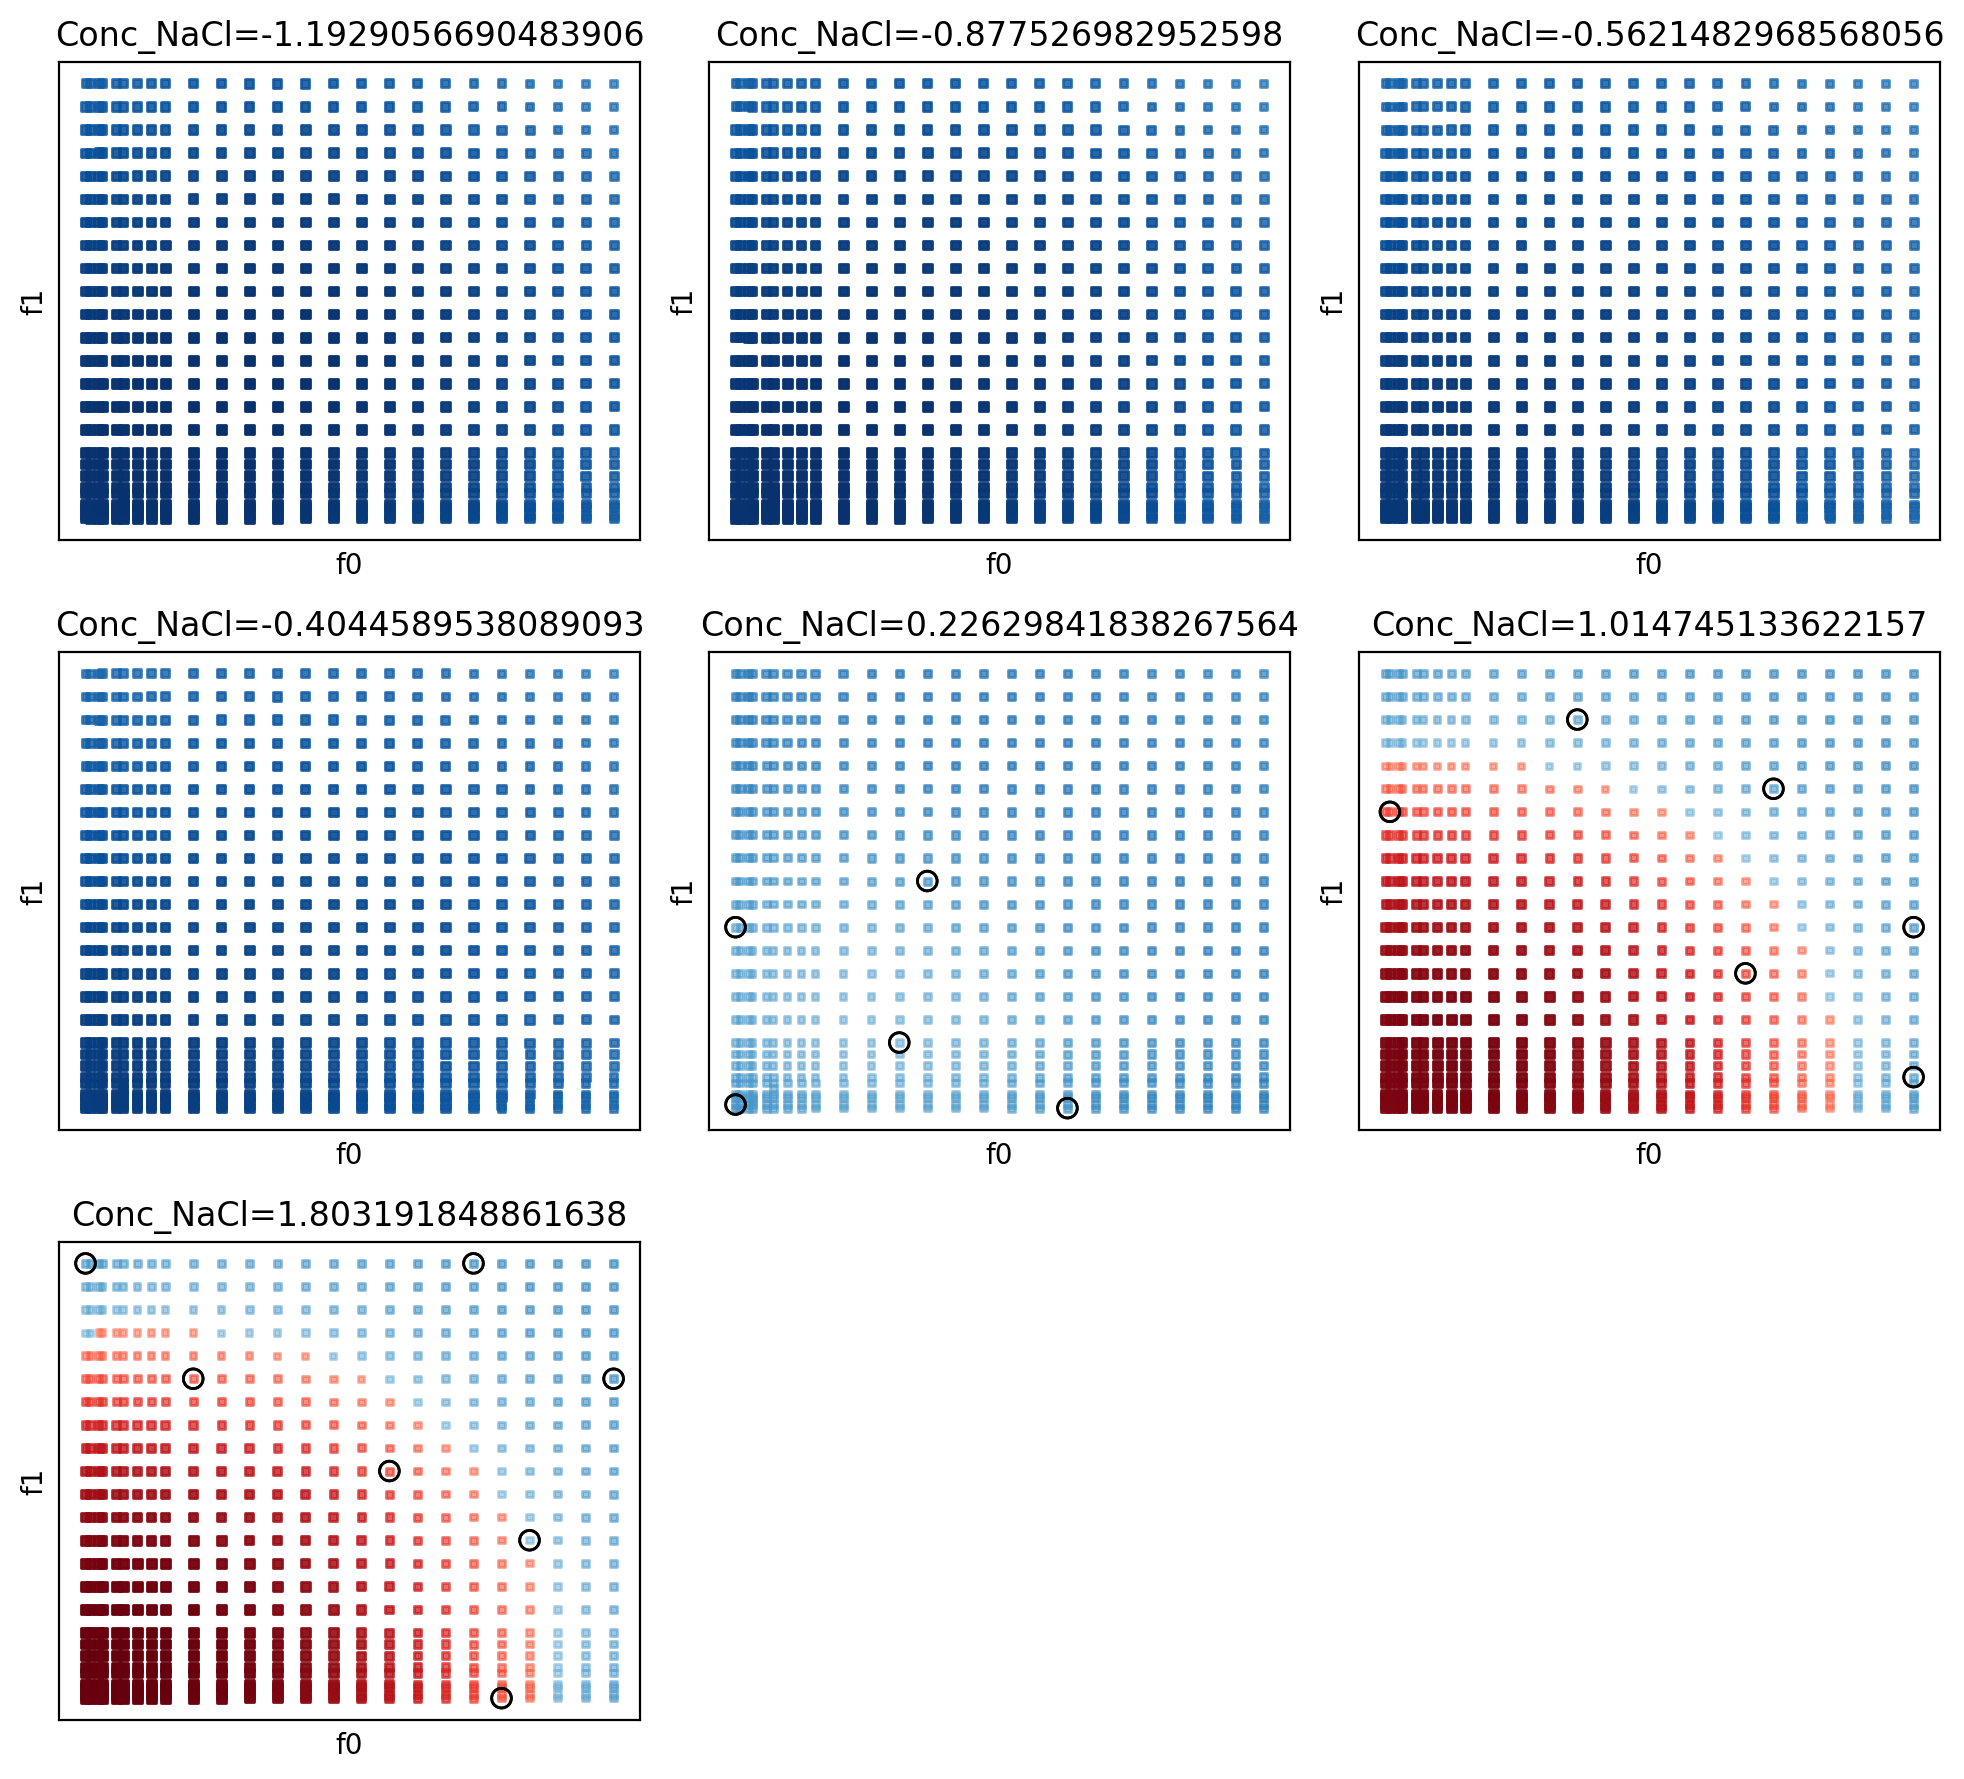

In [38]:
cmap_list = ['Reds', 'Blues', 'Greens']
_Z = al_clf.predict_proba(X=X)
Z = MinMaxScaler().fit_transform(_Z)

fig, ax = get_axes(len(valorigami),3)

for c in range(2):
    alphas = get_alphas(Z=Z[:, c], scale=True)

    for i,val in enumerate(valorigami):

        val_mask = [j for j,v in enumerate(X[forigami].values) if v == val]
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=Z[val_mask, c], cmap=cmap_list[c],
                    vmin=0., vmax=1.,
                    alpha=alphas[val_mask],
                    s=Z[val_mask, c]*10, 
                    marker='s')
            
        choosen_pts = [p for p in val_mask if p in new_idxs_fps]
            
        if len(choosen_pts) > 0:
            ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                        edgecolor='0.', facecolor='none', 
                        s=50, zorder=3)
                

        ax[i].set_title(f'{forigami}={val}')

        ax[i].set_xlabel('f0')
        ax[i].set_ylabel('f1')
        ax[i].set_xticks(())
        ax[i].set_yticks(())

fig.tight_layout()

In [39]:
Z[:, 0]

array([0.0500883 , 0.03093204, 0.02511716, ..., 0.30389347, 0.33423927,
       0.34063261])

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


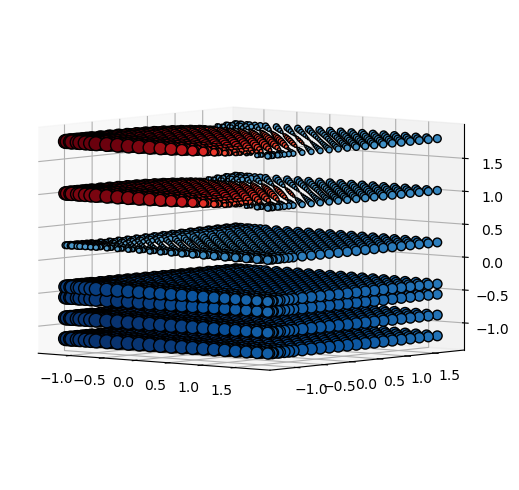

In [40]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')
ax.grid()

for i in range(2):
    ax.scatter(
        X0, X1, X2,
        c=Z[:,i], vmin=0, vmax=1.,
        cmap=cmap_list[i],
        s=(Z[:,i]-.5)*200, #np.log(1.5*Z[:,i])*400,
        alpha=1.,
        edgecolor='0.',
    )

# ax.set_xlabel('f0')
# ax.set_ylabel('f1')
# ax.set_zlabel('f2')

ax.set_proj_type('ortho')

ax.azim = -50
ax.dist = 20
ax.elev = 5

fig.tight_layout()

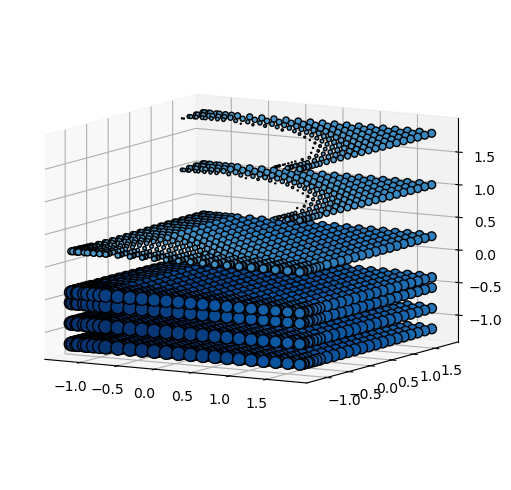

In [41]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(
    X0, X1, X2,
    c=Z[:,1], vmin=0, vmax=1.,
    cmap='Blues',
    s=(Z[:,1]-.5)*200,
    alpha=1.,
    edgecolor='0.',
)

ax.set_proj_type('ortho')

ax.azim = -60
ax.dist = 20
ax.elev = 9

fig.tight_layout()

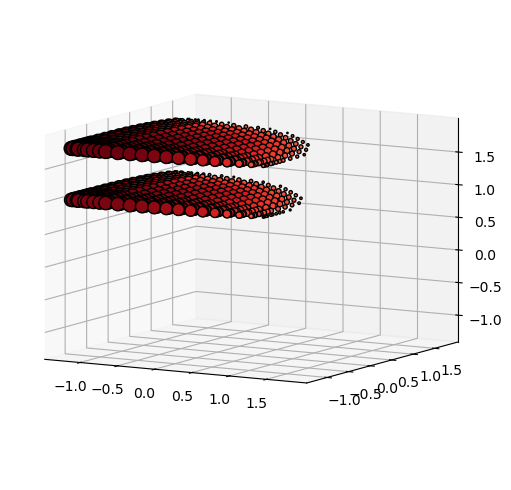

In [42]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(
    X0, X1, X2,
    c=Z[:,0], vmin=0, vmax=1.,
    cmap='Reds',
    s=(Z[:,0]-.5)*200,
    alpha=1.,
    edgecolor='0.',
)

ax.set_proj_type('ortho')

ax.azim = -60
ax.dist = 20
ax.elev = 9

fig.tight_layout()

In [43]:
H = np.around(scipy.stats.entropy(pk=Z, axis=1), 1)
H[0]

0.2

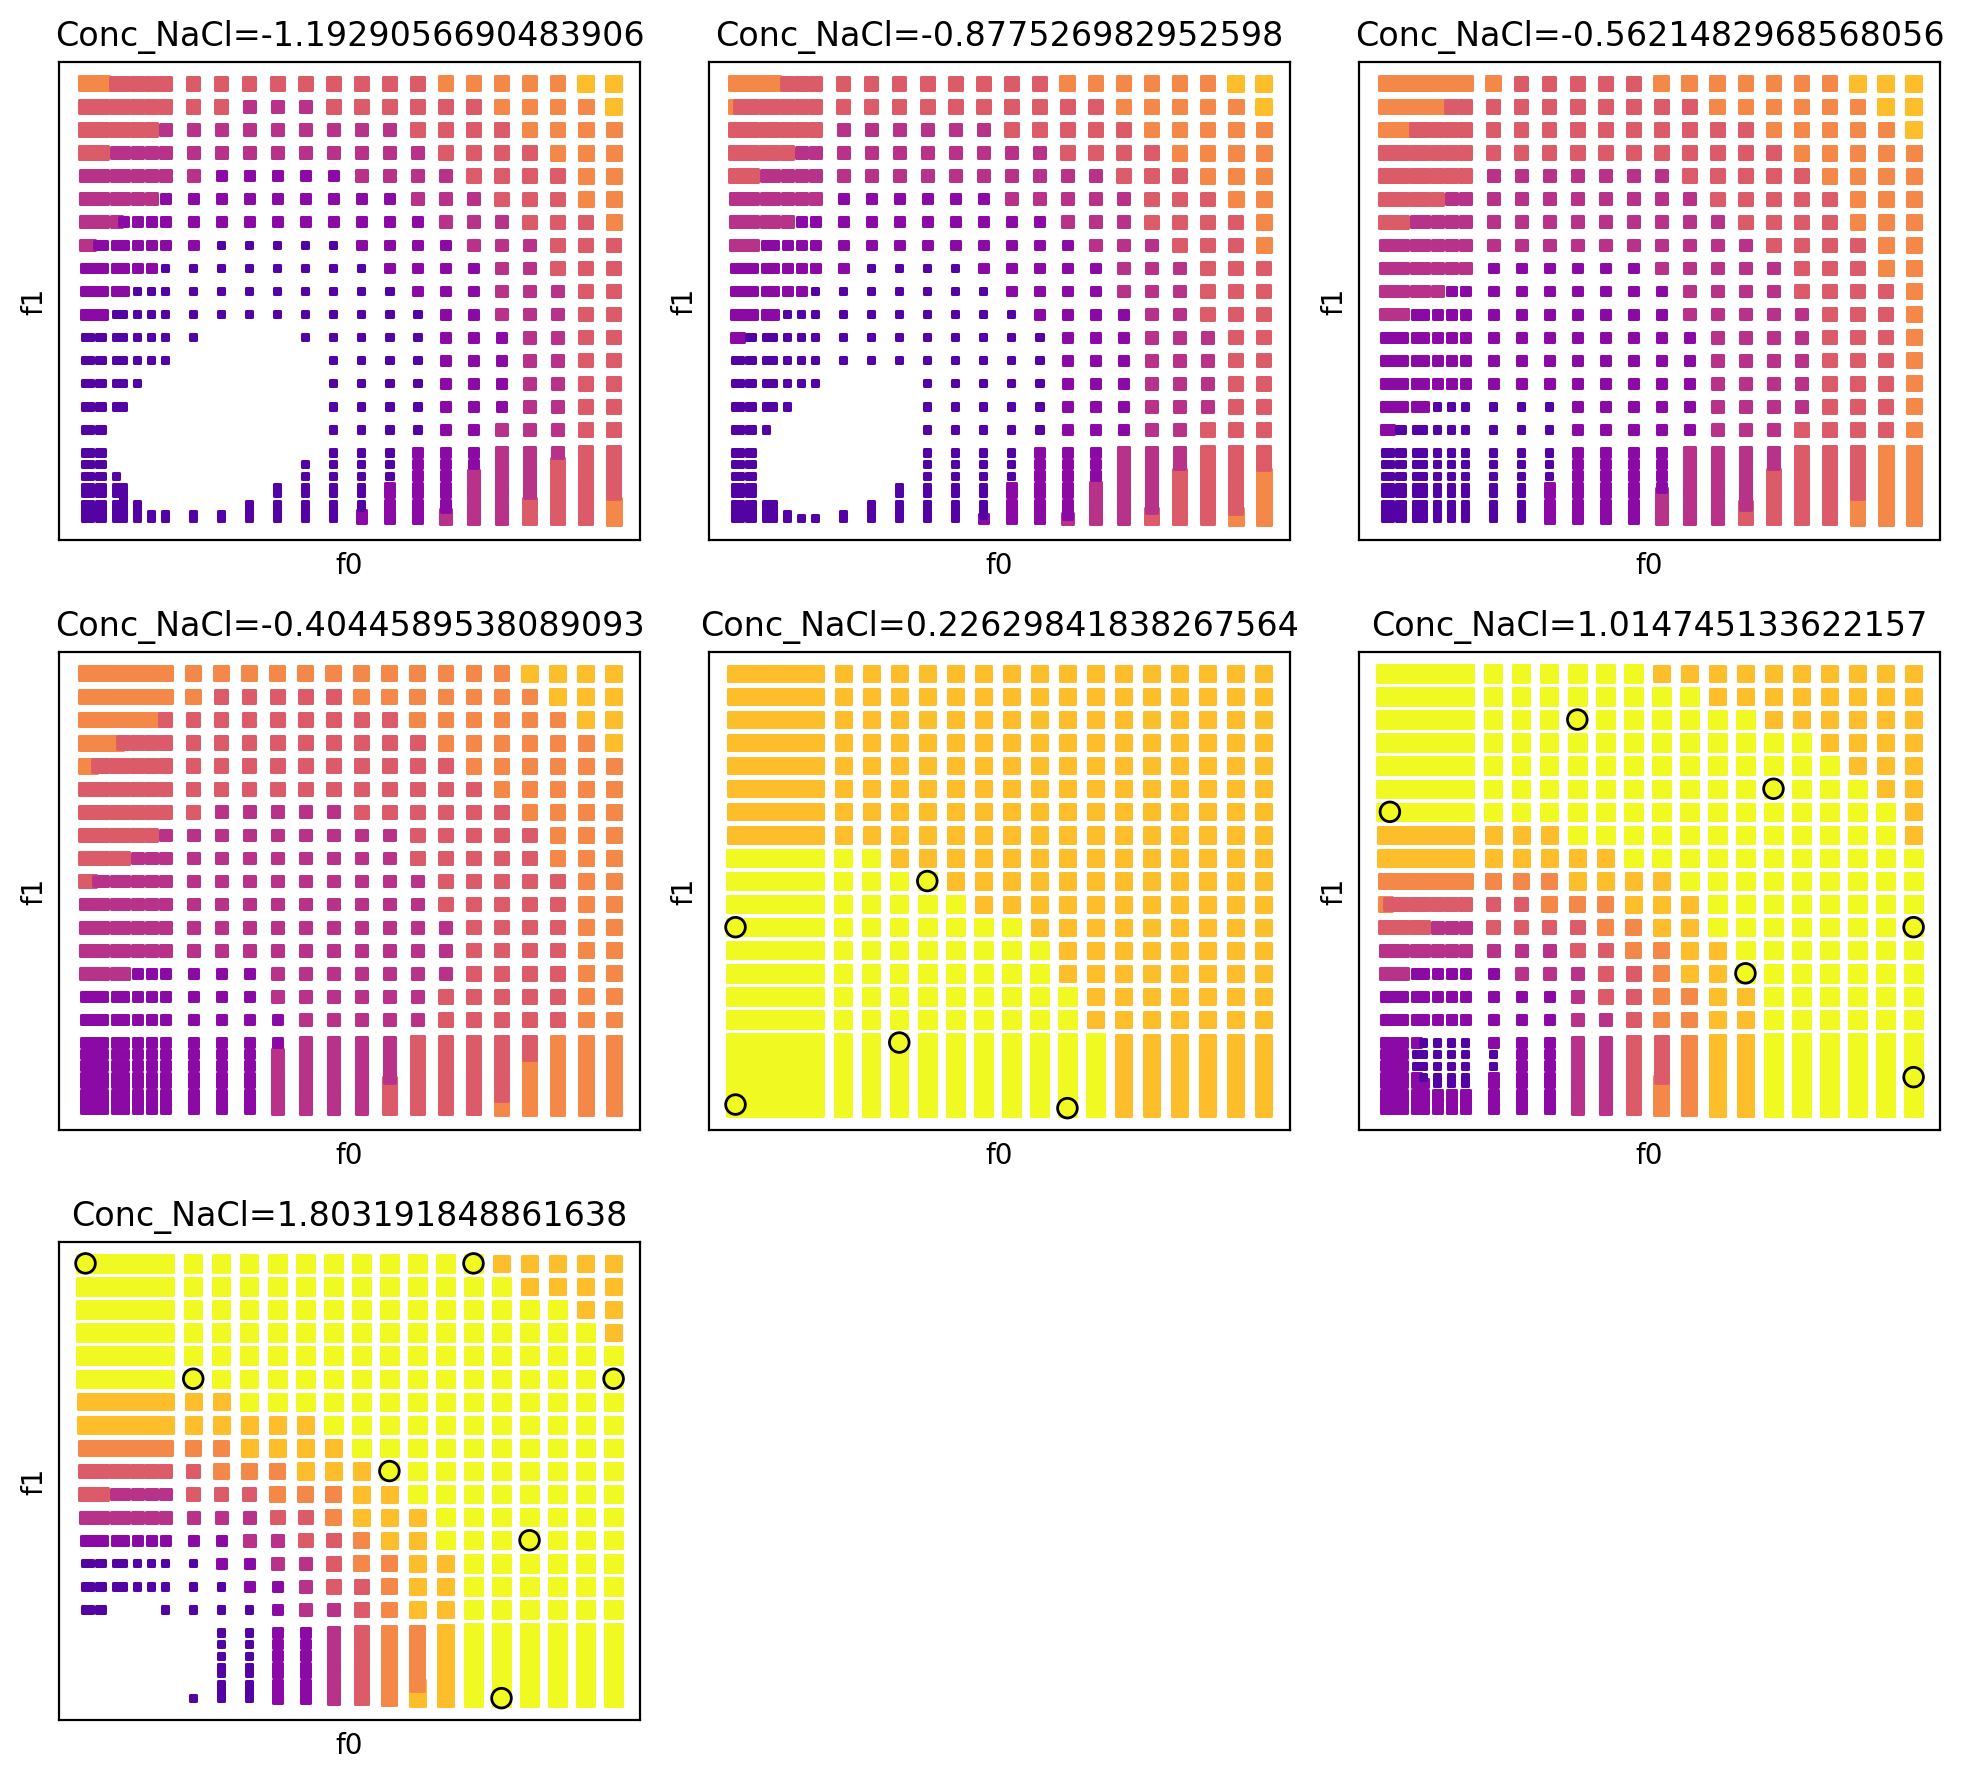

In [44]:
fig, ax = get_axes(len(valorigami),3)

for i,val in enumerate(valorigami):

    val_mask = [i for i,v in enumerate(X[forigami].values) if v == val]
    choosen_pts = [p for p in val_mask if p in new_idxs_fps]
        
    if len(choosen_pts) > 0:
        ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                    edgecolor='0.', facecolor='none', 
                    s=50, zorder=3)

    for c in range(2):
        # alphas = get_alphas(Z=Z[val_mask, c], scale=True)
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=H[val_mask], cmap='plasma',
                    # alpha=alphas,
                    vmin=min(H), vmax=max(H),
                    s=H[val_mask]*50, #Z[val_mask, c]*15, 
                    marker='s')
        
        ax[i].set_title(f'{forigami}={val}')

    ax[i].set_xlabel('f0')
    ax[i].set_ylabel('f1')
    ax[i].set_xticks(())
    ax[i].set_yticks(())

fig.tight_layout()

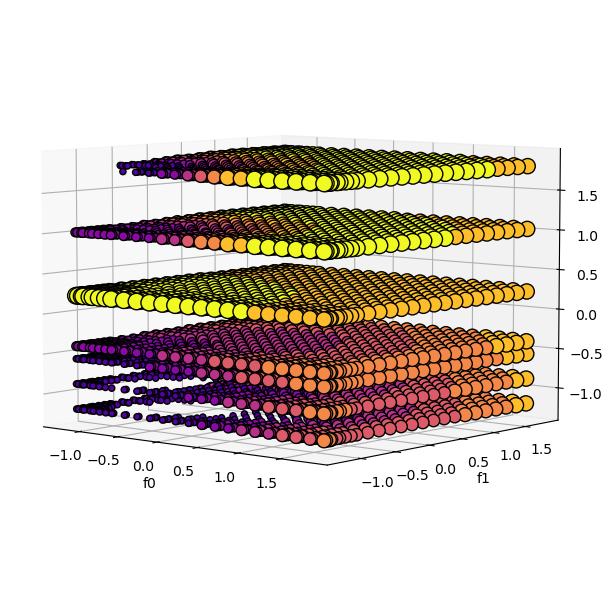

In [45]:
fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(
    X0, X1, X2,
    c=H, vmin=min(H), vmax=max(H),
    cmap='plasma',
    s=H*200,
    alpha=1.,
    edgecolor='0.',
)

ax.set_xlabel('f0')
ax.set_ylabel('f1')
ax.set_zlabel('f2')

ax.azim = -50
ax.dist = 20
ax.elev = 6

fig.tight_layout()